### LCDB 1.1 demo

In [1]:
import numpy as np
import h5py
import matplotlib.pyplot as plt

In [2]:
# OpenML dataset ID
dataset_ids = [3, 6, 11, 12, 14, 15, 16, 18, 22, 23, 28, 29, 31, 32, 37, 38, 44, 46, 50, 54, 151, 182, 188, 300, 307, 458, 469, 554, 1049, 1050, 1053, 1063, 1067, 1068, 1461, 1462, 1464, 1468, 1475, 1478, 1480, 1485, 1486, 1487, 1489, 1494, 1497, 1501, 1510, 1590, 4134, 4534, 4538, 6332, 23381, 23517, 40499, 40668, 40670, 40701, 40923, 40927, 40966, 40975, 40978, 40979, 40982, 40983, 40984, 40994, 40996, 41027]
# anchor definition
anchor_list_denser = np.ceil(16 * 2 ** ((np.arange(137)) / 8)).astype(int)
# learners
learner_zoo = [ 'SVC_linear', 'SVC_poly', 'SVC_rbf', 'SVC_sigmoid', 'DecisionTree', 'ExtraTree','LogisticRegression', 'PassiveAggressive', 'Perceptron', 'RidgeClassifier', 'SGDClassifier', 'MLPClassifier', 'LDA', 'QDA', 'BernoulliNB', 'MultinomialNB', 'ComplementNB', 'GaussianNB','KNN', 'NearestCentroid', 'ens.ExtraTrees', 'ens.RandomForest', 'ens.GradientBoosting','DummyClassifier']

In [3]:
file_path = './LCDB11_ER_CC18_noFS_raw_compress.hdf5'

with h5py.File(file_path, 'r') as hdf_file:
    dataset = hdf_file['error_rate'][...]
    print("Shape of dataset (dataset, learner, outer split, inner split, anchor, train-val-test):", dataset.shape)

Shape of dataset (dataset, learner, outer split, inner split, anchor, train-val-test): (72, 24, 5, 5, 137, 3)


### Visualization

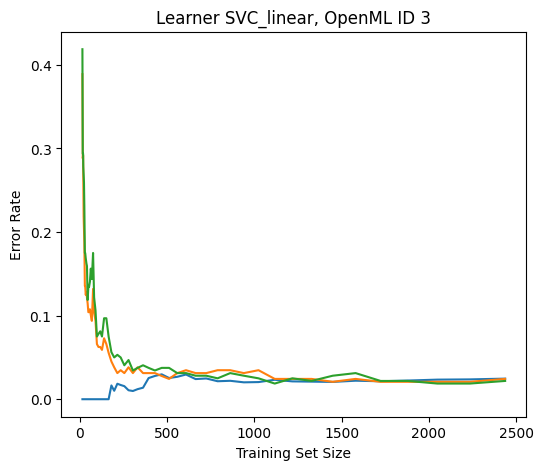

In [4]:
dataset_index = 0
learner_index = 0
outer_split = 0
inner_split = 0

plt.figure(figsize=(6, 5))
plt.plot(anchor_list_denser, dataset[dataset_index, learner_index, outer_split, inner_split,:, 0], label="Training")
plt.plot(anchor_list_denser, dataset[dataset_index, learner_index, outer_split, inner_split,:, 1], label="Validataion")
plt.plot(anchor_list_denser, dataset[dataset_index, learner_index, outer_split, inner_split,:, 2], label="Testing")
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.show()

C:\Users\cyan1\AppData\Local\Temp\ipykernel_15016\2939700755.py:6: RuntimeWarning: Mean of empty slice
  mean_curve = np.nanmean(dataset[dataset_index, learner_index, :, :, :, train_val_test], axis=(0, 1))
C:\Users\cyan1\AppData\Roaming\Python\Python311\site-packages\numpy\lib\nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


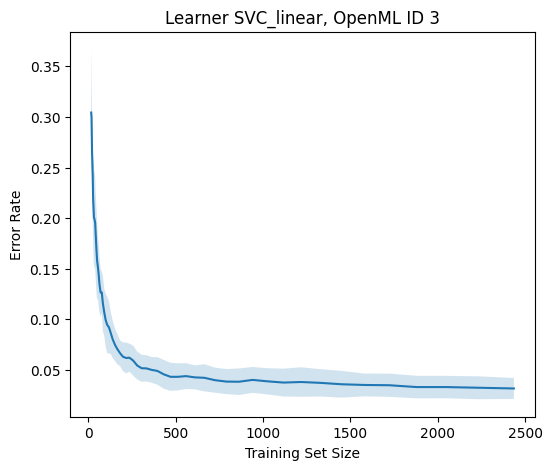

In [5]:
dataset_index = 0
learner_index = 0
train_val_test = 1

plt.figure(figsize=(6, 5))
mean_curve = np.nanmean(dataset[dataset_index, learner_index, :, :, :, train_val_test], axis=(0, 1))
std_curve = np.nanstd(dataset[dataset_index, learner_index, :, :, :, train_val_test], axis=(0, 1))
plt.plot(anchor_list_denser, mean_curve, label='LCDB 1.1')
plt.fill_between(anchor_list_denser, mean_curve - std_curve, mean_curve + std_curve, alpha=0.2)
plt.title(f'Learner {learner_zoo[learner_index]}, OpenML ID {dataset_ids[dataset_index]}')
plt.xlabel('Training Set Size')
plt.ylabel('Error Rate')
plt.show()